# RandomVector

## Résumé

Dans ce segment, nous présentons la classe `RandomVector`. Nous présentons en particulier le lien et les différences avec la classe `ComposedDistribution`. 

In [1]:
import openturns as ot

## Solution de l'exercice 1 : : une fonction à trois entrées

In [2]:
inputDistribution = ot.ComposedDistribution([ot.Normal()] * 3)
inputRandomVector = ot.RandomVector(inputDistribution)
mySymbolicSimulator = ot.SymbolicFunction(
    ["X1", "X2", "X3"], ["X1 + X2 + X3", "X1 - X2 * X3"]
)
outputRandomVector = ot.CompositeRandomVector(mySymbolicSimulator, inputRandomVector)

## Solution de l'exercice 2 : quatre conversions

1. On peut toujours convertir un `RandomVector` en `RandomVector` : facile.

In [3]:
print(ot.RandomVector(inputRandomVector))

class=RandomVector implementation=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[2]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 im

2. On peut toujours convertir une `Distribution` en `Distribution` : bien sûr.

In [4]:
print(ot.Distribution(inputDistribution))

ComposedDistribution(Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), IndependentCopula(dimension = 3))


3. On peut toujours convertir une `Distribution` en `RandomVector` : puisque la distribution est connue, cette conversion ne pose aucun problème.

In [5]:
print(ot.RandomVector(inputDistribution))

class=RandomVector implementation=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[2]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 im

4. On ne peut pas convertir un `RandomVector` en `Distribution`.

In [7]:
# Décommenter la ligne ci-dessous (génère une exception)
# ot.Distribution(inputRandomVector)

En effet, la distribution n'est pas connue dans le vecteur aléatoire `inputRandomVector` : il est donc impossible de créer la `ComposedDistribution`. 

## Exercice 3 : composition de RandomVector


In [7]:
def mySimulator2(x):
    y0 = x[0] + x[1]
    y1 = x[1] * x[2]
    y = [y0, y1]
    return y

## Solution de l'exercice 3 : composition de RandomVector

On peut composer deux `RandomVector`. 

In [8]:
def mySimulator(x):
    y0 = x[0] + x[1] + x[2]
    y1 = x[0] - x[1] * x[2]
    y = [y0, y1]
    return y

In [9]:
X0 = ot.Normal(0.0, 1.0)
X1 = ot.Normal(0.0, 1.0)
X2 = ot.Normal(0.0, 1.0)
inputDistribution = ot.ComposedDistribution((X0, X1, X2))
inputRandomVector = ot.RandomVector(inputDistribution)
myWrapper = ot.PythonFunction(3, 2, mySimulator)
outputRandomVector = ot.CompositeRandomVector(myWrapper, inputRandomVector)
outputRandomVector.getSample(5)

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[y0,y1] data=[[0.487718,0.772905],[-1.36016,-1.17351],[-1.29108,2.85312],[0.733261,2.24547],[-2.70001,-1.14094]]

In [10]:
def mySimulator2(x):
    y0 = x[0] + x[1]
    y1 = x[1] ** 2
    y = [y0, y1]
    return y

In [11]:
myWrapper2 = ot.PythonFunction(2, 2, mySimulator2)
outputRandomVector2 = ot.CompositeRandomVector(myWrapper2, outputRandomVector)
outputRandomVector2.getSample(5)

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[y0,y1] data=[[0.056386,0.00252581],[2.63213,0.70415],[2.3156,2.92674],[-1.84677,0.250058],[0.953298,0.665135]]

Alternative : composer les deux fonctions, puis créer le `RandomVector`. 

In [12]:
myWrapper3 = ot.ComposedFunction(myWrapper2, myWrapper)
outputRandomVector3 = ot.CompositeRandomVector(myWrapper3, inputRandomVector)
outputRandomVector3.getSample(5)

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[y0,y1] data=[[-0.440495,1.27921],[0.133723,0.0140447],[-4.01924,3.25682],[0.995275,0.651874],[3.21616,1.66529]]

In [ ]:
def myCompositeAMoi(x):
    y = myWrapper(x)
    y2 = myWrapper2(y)
    return y2

## Solution de l'exercice 4 :  la classe CompositeDistribution

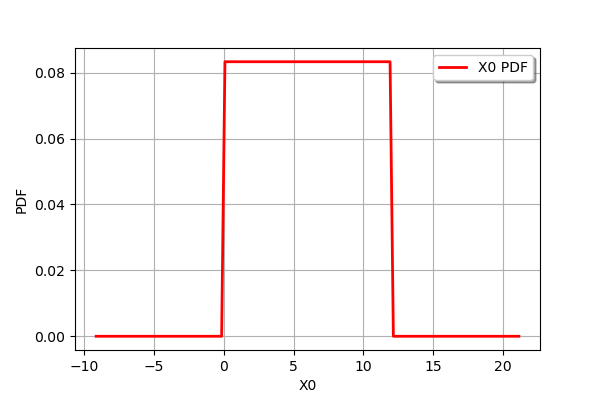

In [13]:
distributionX = ot.Uniform(0, 12)
distributionX.drawPDF()

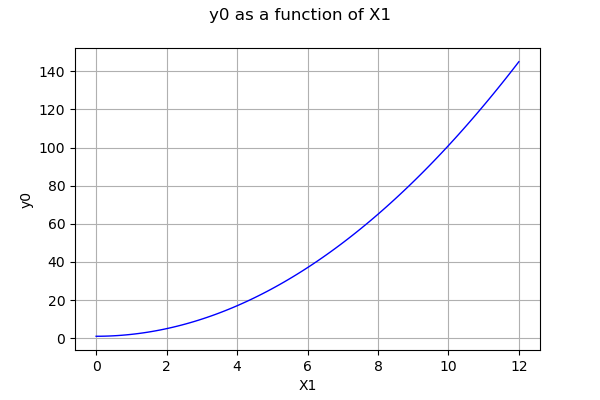

In [14]:
maFonc = ot.SymbolicFunction(["X1"], ["1 + X1 ^ 2"])
maFonc.draw(0, 12, 100)

In [15]:
outputDistEx4 = ot.CompositeDistribution(maFonc, distributionX)

Dessine la distribution de $Y$.

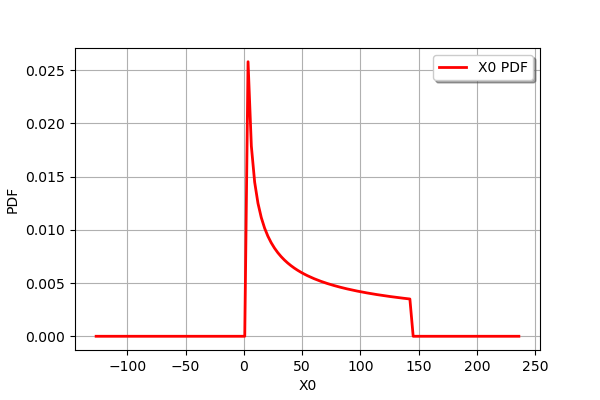

In [16]:
outputDistEx4.drawPDF()